In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

path = "../data/train.csv"

random_state = 73

In [2]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Vielleicht kann man aus Ticket und Kabine einen Zusammenhang ableiten,um Missing Values zu befüllen.

In [5]:
df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [6]:
df.groupby(["Ticket", "Cabin"]).count()

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  \
Ticket            Cabin                                                         
110152            B77              2         2       2     2    2    2      2   
                  B79              1         1       1     1    1    1      1   
110413            E67              2         2       2     2    2    2      2   
                  E68              1         1       1     1    1    1      1   
110465            A14              1         1       1     1    1    0      1   
...                              ...       ...     ...   ...  ...  ...    ...   
SC/AH Basle 541   D                1         1       1     1    1    1      1   
SC/Paris 2163     D                1         1       1     1    1    1      1   
SOTON/O.Q. 392078 E10              1         1       1     1    1    1      1   
W.E.P. 5734       E31              1         1       1     1    1    1      1   
WE/P 5735         B22              2         2       2     2    2    2      2   

                         Parch  Fare  Embarked  
Ticket            Cabin                         
110152            B77        2     2         2  
                  B79        1     1         1  
110413            E67        2     2         2  
                  E68        1     1         1  
110465            A14        1     1         1  
...                        ...   ...       ...  
SC/AH Basle 541   D          1     1         1  
SC/Paris 2163     D          1     1         1  
SOTON/O.Q. 392078 E10        1     1         1  
W.E.P. 5734       E31        1     1         1  
WE/P 5735         B22        2     2         2  

[161 rows x 10 columns]

- Ganz offensichtlich ist noch keine Systematik bei den Tickets erkennbar. Wir könnten aber mal die Buchstaben und Zahlen bei den Tickets aufteilen und schauen, ob wir daraus eine Systematik ableiten können.

In [7]:
df[df["Embarked"] == "Q"]["Ticket"].unique()

array(['330877', '382652', '330923', '330959', '335677', '330958',
       '370371', '14311', '330932', '371110', '370369', '370372',
       '365222', '35851', '370365', '364849', '368703', '370370',
       '367231', '367229', '367230', '19928', '384461', '382649',
       '370375', '336439', '370373', '9234', '367226', '226593', '234818',
       '330931', '330980', '14313', '367655', '394140', 'A/5. 13032',
       '364851', '371060', '36209', '364846', '330909', '382651',
       '367232', '330979', '372622', '14312', '364848', '370377',
       '219533', '334912', '330919', '365226', '330935', '35852', '36864',
       '36568', '36866', '335097', '364850', '383121', '36865', '12460',
       '368323', '367228', '370376'], dtype=object)

In [8]:
df[df["Embarked"] == "S"]["Ticket"].unique()

array(['A/5 21171', 'STON/O2. 3101282', '113803', '373450', '17463',
       '349909', '347742', 'PP 9549', '113783', 'A/5. 2151', '347082',
       '350406', '248706', '244373', '345763', '239865', '248698',
       '113788', '347077', '19950', '349216', 'C.A. 24579', '113789',
       'A./5. 2152', '345764', '7546', '11668', 'S.C./A.4. 23567',
       '349237', '3101295', 'A/4. 39886', '2926', '19947', 'C.A. 31026',
       'C.A. 34651', 'CA 2144', '36973', '347088', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '1601', '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '113059', 'SO/C 14885', '3101278', 'W./C. 6608',
       'SOTON/OQ 392086', '343275', '343276', '347466', 'W.E.P. 5734',
       'C.A. 2315', '364500', '374910', '231919', '244367', '349245',
       '349215', '35281', '7540', '3101276', '349207', '343120', '312991',
       '349249', '110465', '324669', '4136', 'STON/O 2. 3101294',
       'A4. 54510', '272

In [9]:
ticket_chars = df["Ticket"].str.extract('([A-Za-z./]+[0-9]*)', expand=False)
df["TicketChars"] = ticket_chars
ticket_chars.value_counts()

Ticket
PC            60
C.A.          27
A/5           17
STON/O        12
W./C.          9
CA.            8
SOTON/O.Q.     8
SOTON/OQ       7
STON/O2        6
A/4            6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
SC/AH          3
PP             3
S.O./P.P.      3
A.5            2
A./5           2
WE/P           2
P/PP           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
SC             1
F.C.           1
A/S            1
SO/C           1
W/C            1
SCO/W          1
SW/PP          1
W.E.P.         1
Fa             1
S.O.P.         1
S.C./A.4       1
S.P.           1
A4             1
C.A./SOTON     1
Name: count, dtype: int64

In [10]:
df_ticket_number = df["Ticket"].str.extract(
    ' ([0-9]+)', expand=False).fillna(df["Ticket"])
df["TicketNumber"] = df_ticket_number
df_ticket_number.value_counts()

Ticket
2         12
2343       7
347082     7
1601       7
2144       6
          ..
19988      1
2693       1
17612      1
349233     1
370376     1
Name: count, Length: 668, dtype: int64

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketChars,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450


Wir separieren den Titel aus dem Namen

In [12]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

Außerdem teilen wir die Cabin in Deck und Room auf

In [13]:
df["Deck"] = df["Cabin"].str.extract('([A-Za-z])', expand=False)
df["Room"] = df["Cabin"].str.extract('([0-9]+)', expand=False)

Wir teilen Fare durch die Anzahl der Tickets

In [14]:
numer_of_cabins = df.groupby("Ticket", as_index=False).agg(NumberOfCabins=("Ticket", "count"))
df = df.merge(numer_of_cabins, on="Ticket")
df["CabinPrice"] = df["Fare"] / df["NumberOfCabins"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketChars,TicketNumber,Title,Deck,Room,NumberOfCabins,CabinPrice
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Mr,NaN,NaN,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599,Mrs,C,85,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2,3101282,Miss,NaN,NaN,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803,Mrs,C,123,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450,Mr,NaN,NaN,1,8.0500


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketChars,TicketNumber,Title,Deck,Room,NumberOfCabins,CabinPrice
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Mr,NaN,NaN,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599,Mrs,C,85,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2,3101282,Miss,NaN,NaN,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803,Mrs,C,123,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450,Mr,NaN,NaN,1,8.0500


<Axes: >

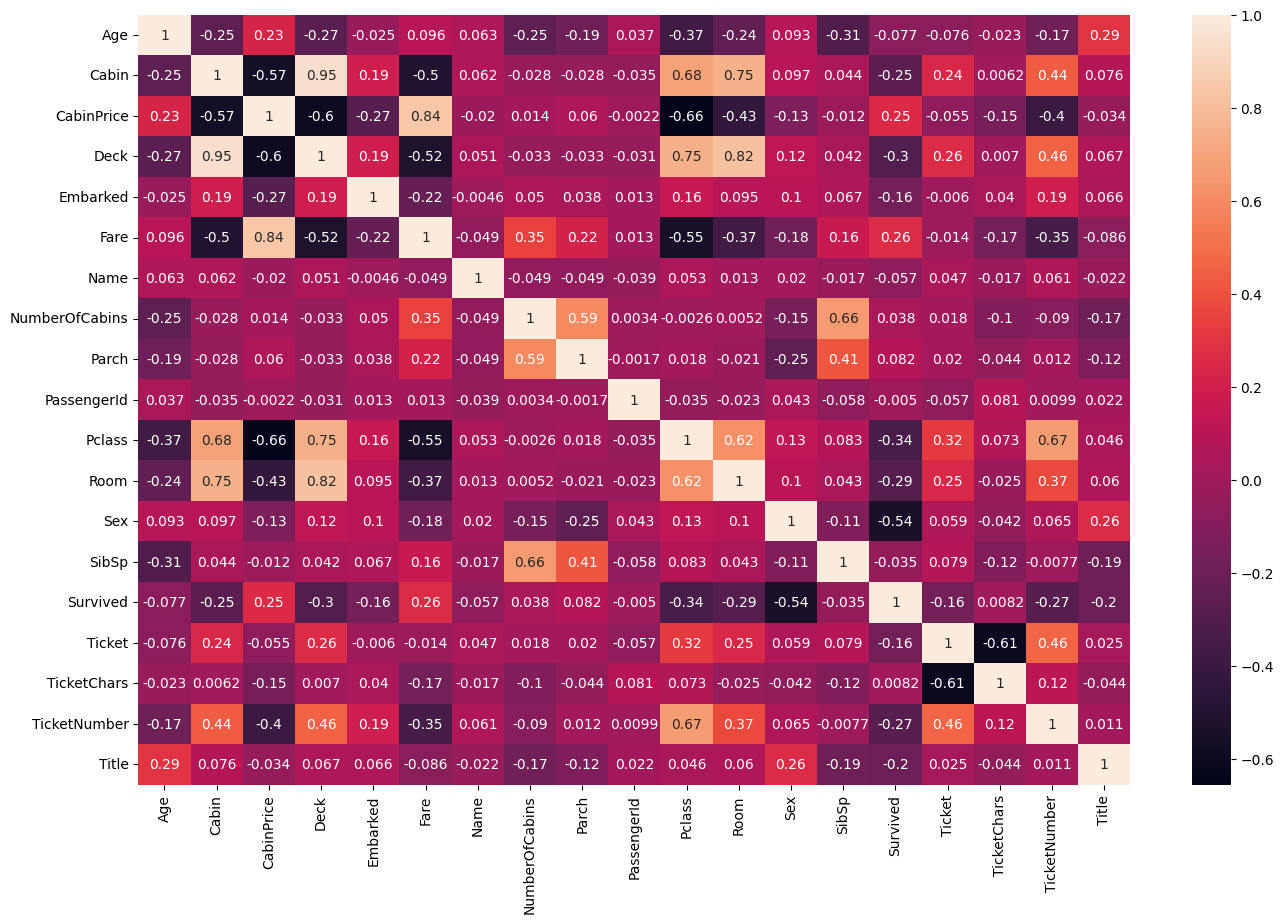

In [16]:
from sklearn.preprocessing import LabelEncoder
# perform al label encoding for all colummns that are not-numerical

enoder = LabelEncoder()

df_encoded = df.copy()

for column in df.columns:
    if df_encoded[column].dtype == type(object):
        df_encoded[column] = enoder.fit_transform(df_encoded[column])

# sort columns by alphabetical order
df_encoded = df_encoded.reindex(sorted(df_encoded.columns), axis=1)

fig = plt.figure(figsize=(16, 10))
sns.heatmap(df_encoded.corr(), annot=True)

<Axes: >

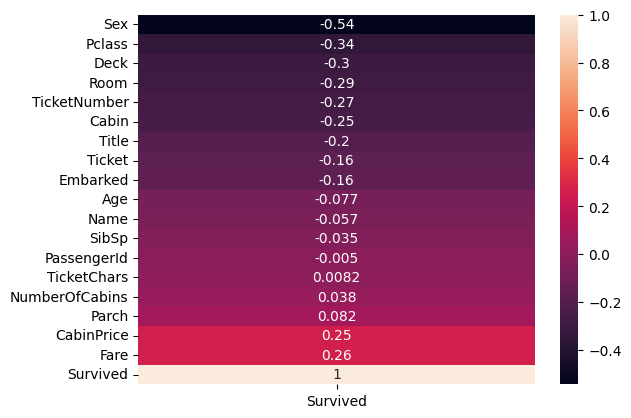

In [17]:
sns.heatmap(pd.DataFrame(df_encoded.corr()["Survived"]).sort_values(by="Survived"), annot=True)

Wir überlegen, ob wir die Feartures entfernen können, welche wir aufgeteilt haben. Das waren:

- Cabin -> Behalten nur Deck und Room
- Ticket -> Behalten nur TicketNumber und TicketPrefix
- Name -> Behalten nur Title
- Fare behalten wir erstmal, aber schauen noch einmal

In [18]:
columns_to_drop = ["Name", "Ticket", "Cabin",  "NumberOfCabins", "PassengerId", "SibSp"]

In [19]:
X = df_encoded.drop(columns_to_drop + ["Survived"], axis=1)
y = df_encoded["Survived"]

clf = DecisionTreeClassifier(
    random_state=random_state, min_samples_leaf=15, max_depth=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7821229050279329

In [20]:

clf.score(X_train, y_train)

0.851123595505618

[Text(0.46875, 0.9375, 'Sex <= 0.5\ngini = 0.478\nsamples = 712\nvalue = [431, 281]'),
 Text(0.25, 0.8125, 'Pclass <= 2.5\ngini = 0.382\nsamples = 261\nvalue = [67, 194]'),
 Text(0.359375, 0.875, 'True  '),
 Text(0.125, 0.6875, 'TicketNumber <= 56.5\ngini = 0.096\nsamples = 138\nvalue = [7, 131]'),
 Text(0.08333333333333333, 0.5625, 'gini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(0.16666666666666666, 0.5625, 'Fare <= 28.856\ngini = 0.066\nsamples = 117\nvalue = [4, 113]'),
 Text(0.125, 0.4375, 'Age <= 37.0\ngini = 0.14\nsamples = 53\nvalue = [4, 49]'),
 Text(0.08333333333333333, 0.3125, 'Age <= 24.5\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.20833333333333334, 0.4375, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]'),
 Text(0.375, 0.6875, 'Fa

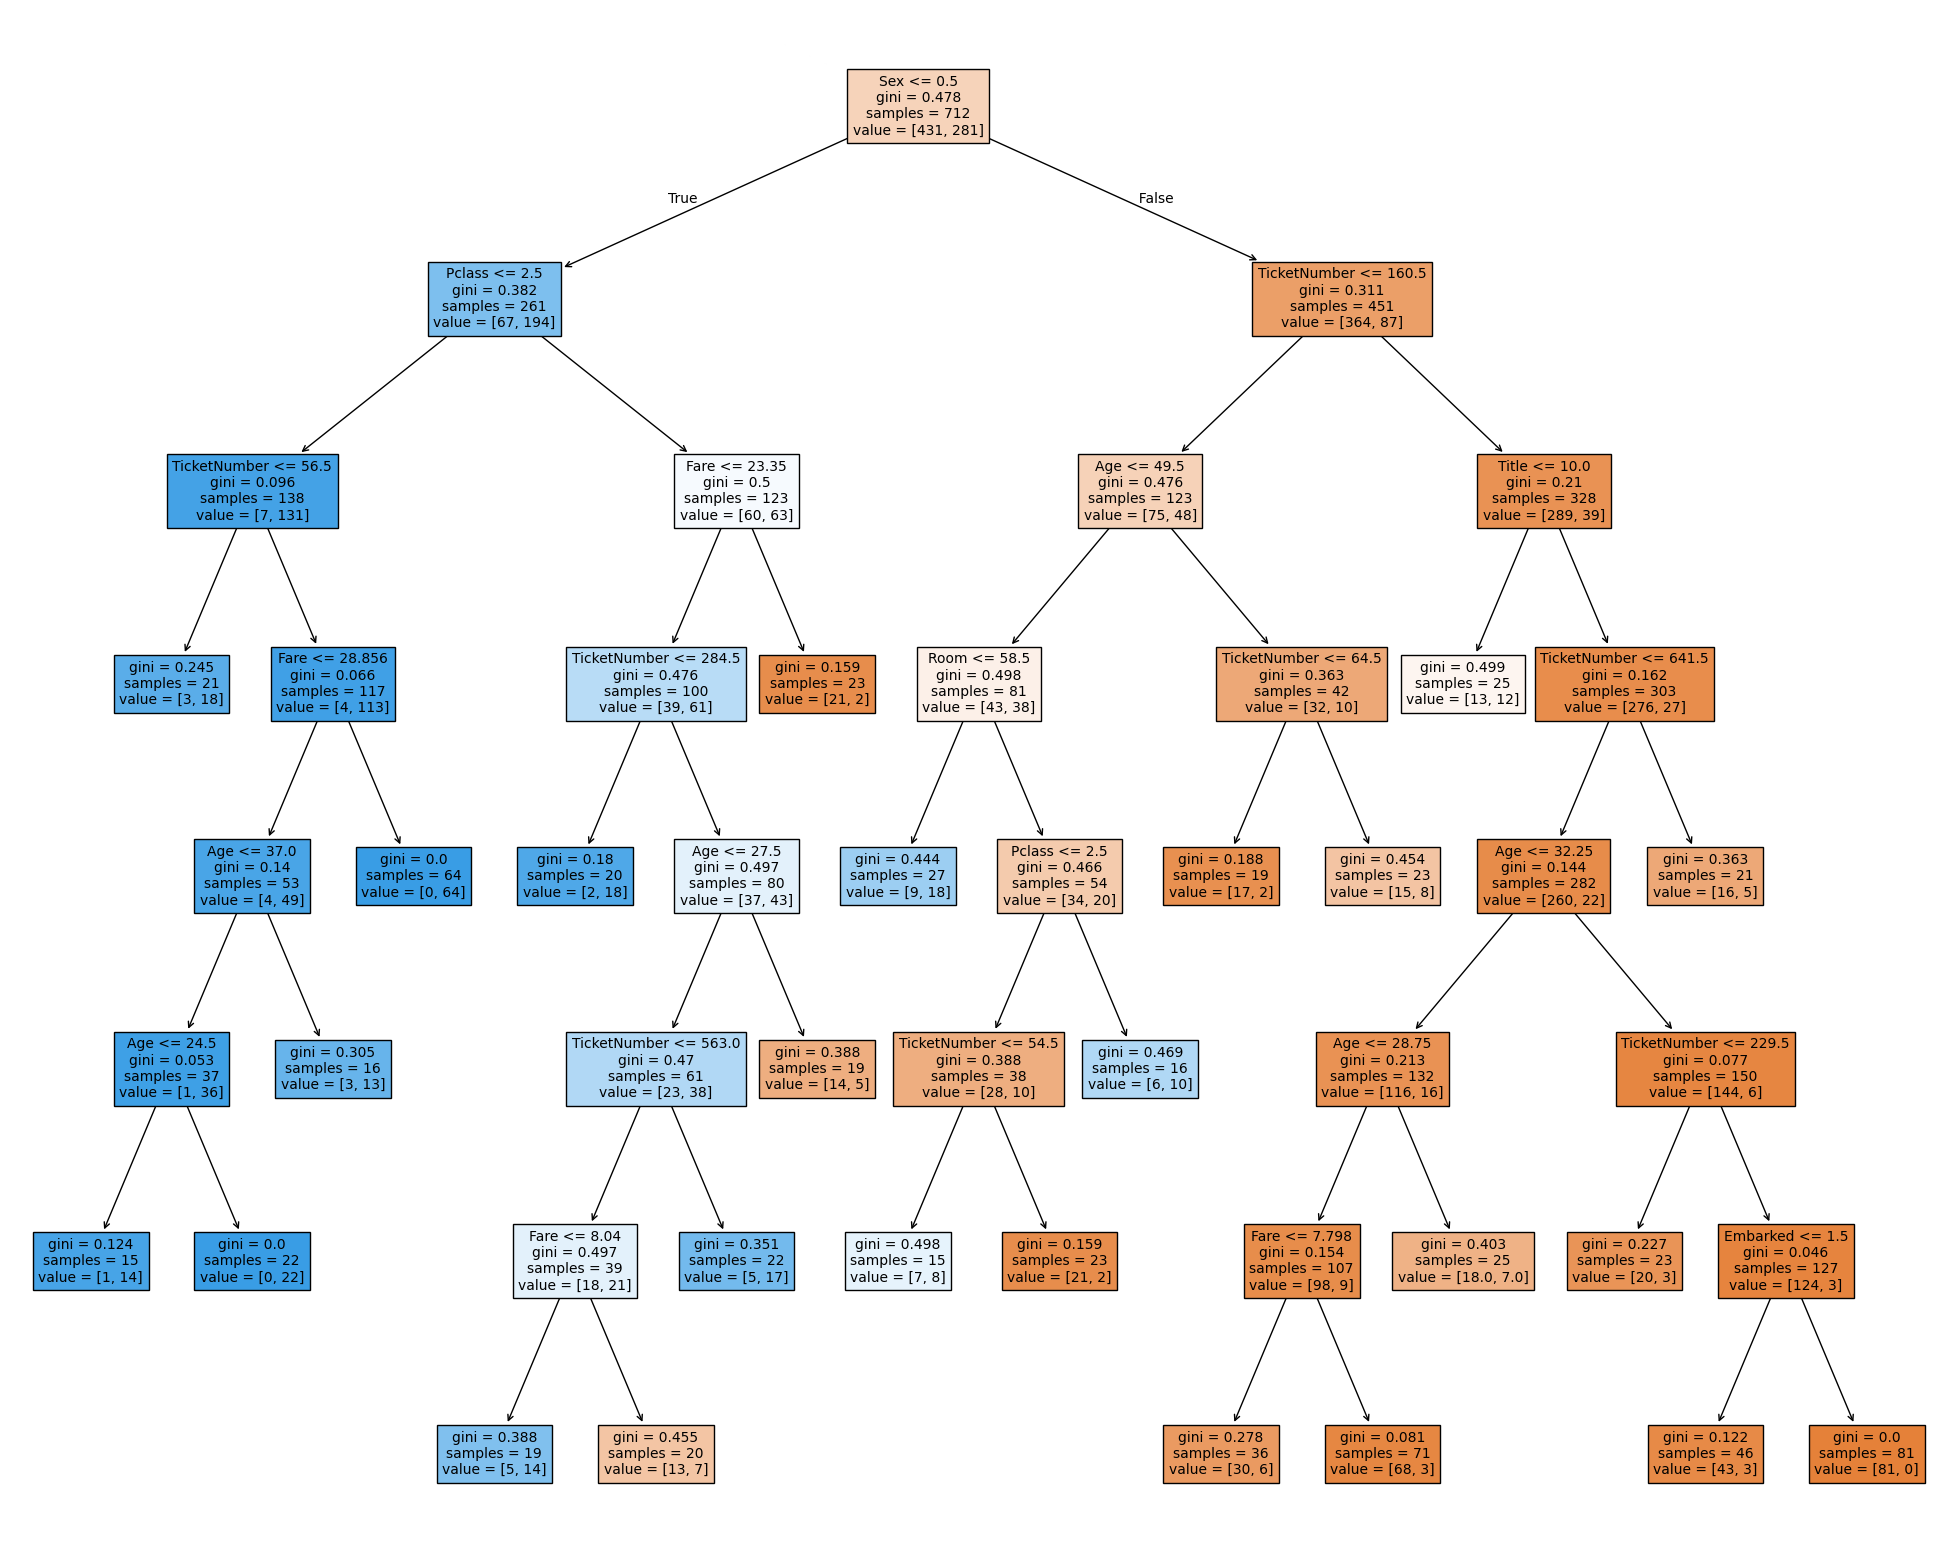

In [21]:
# display the tree

from sklearn.tree import plot_tree


fig = plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=X.columns, filled=True, fontsize=10)

In [65]:
# get accuracy of the model on training data
clf.score(X_train, y_train)


0.8384831460674157

In [55]:
# get all used features
clf.feature_importances_

array([0.08604734, 0.08410948, 0.11787987, 0.29442528, 0.09045504,
       0.01772904, 0.01603931, 0.02997236, 0.08937702, 0.01878693,
       0.00599955, 0.01578574, 0.13339303])